In [3]:
# @title VotingEnsembly Apple Oranges
# Import models and utility functions
import pandas as pd

from sklearn.ensemble import VotingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.datasets import load_iris
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
data = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/apples_and_oranges.csv")

In [4]:
from sklearn.model_selection import train_test_split
training_set, test_set = train_test_split(data, test_size = 0.2, random_state = 1)

In [5]:
X_train = training_set.iloc[:,0:2].values
Y_train = training_set.iloc[:,2].values
X_test = test_set.iloc[:,0:2].values
Y_test = test_set.iloc[:,2].values

In [6]:
# group / ensemble of models
estimator = []
estimator.append(('LR',
                  LogisticRegression(solver ='lbfgs',
                                     multi_class ='multinomial',
                                     max_iter = 200)))
estimator.append(('SVC', SVC(gamma ='auto', probability = True)))
estimator.append(('DTC', DecisionTreeClassifier()))

In [7]:
# Voting Classifier with hard voting
vot_hard = VotingClassifier(estimators = estimator, voting ='hard')
vot_hard.fit(X_train, Y_train)
y_pred = vot_hard.predict(X_test)

# using accuracy_score metric to predict accuracy
score = accuracy_score(Y_test, y_pred)
print("Hard Voting Score % d" % score)

Hard Voting Score  0


In [8]:
# Voting Classifier with soft voting
vot_soft = VotingClassifier(estimators = estimator, voting ='soft')
vot_soft.fit(X_train, Y_train)
y_pred = vot_soft.predict(X_test)

# using accuracy_score
score = accuracy_score(Y_test, y_pred)
print("Soft Voting Score % d" % score)

Soft Voting Score  0


In [9]:
# compare hard voting to standalone classifiers
from numpy import mean
from numpy import std
from sklearn.datasets import make_classification
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import VotingClassifier
from matplotlib import pyplot

>knn1 1.000 (0.000)
>knn3 1.000 (0.000)
>knn5 1.000 (0.000)
>knn7 0.919 (0.135)
>knn9 0.908 (0.142)
>hard_voting 1.000 (0.000)


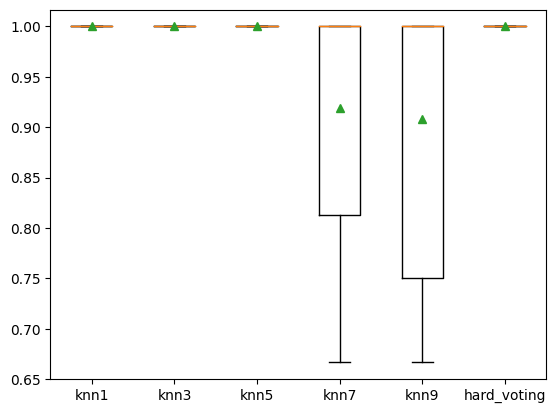

In [10]:
# get a voting ensemble of models
def get_voting():
 # define the base models
 models = list()
 models.append(('knn1', KNeighborsClassifier(n_neighbors=1)))
 models.append(('knn3', KNeighborsClassifier(n_neighbors=3)))
 models.append(('knn5', KNeighborsClassifier(n_neighbors=5)))
 models.append(('knn7', KNeighborsClassifier(n_neighbors=7)))
 models.append(('knn9', KNeighborsClassifier(n_neighbors=9)))
 # define the voting ensemble
 ensemble = VotingClassifier(estimators=models, voting='hard')
 return ensemble

# get a list of models to evaluate
def get_models():
 models = dict()
 models['knn1'] = KNeighborsClassifier(n_neighbors=1)
 models['knn3'] = KNeighborsClassifier(n_neighbors=3)
 models['knn5'] = KNeighborsClassifier(n_neighbors=5)
 models['knn7'] = KNeighborsClassifier(n_neighbors=7)
 models['knn9'] = KNeighborsClassifier(n_neighbors=9)
 models['hard_voting'] = get_voting()
 return models

# evaluate a give model using cross-validation
def evaluate_model(model, X_train, Y_train):
 cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
 scores = cross_val_score(model, X_train, Y_train, scoring='accuracy', cv=cv, n_jobs=-1, error_score='raise')
 return scores

# get the models to evaluate
models = get_models()
# evaluate the models and store results
results, names = list(), list()
for name, model in models.items():
 scores = evaluate_model(model, X_train, Y_train)
 results.append(scores)
 names.append(name)
 print('>%s %.3f (%.3f)' % (name, mean(scores), std(scores)))
# plot model performance for comparison
pyplot.boxplot(results, labels=names, showmeans=True)
pyplot.show()

>svm1 0.533 (0.145)
>svm2 0.978 (0.083)
>svm3 0.908 (0.142)
>svm4 0.908 (0.142)
>svm5 1.000 (0.000)
>soft_voting 0.908 (0.142)


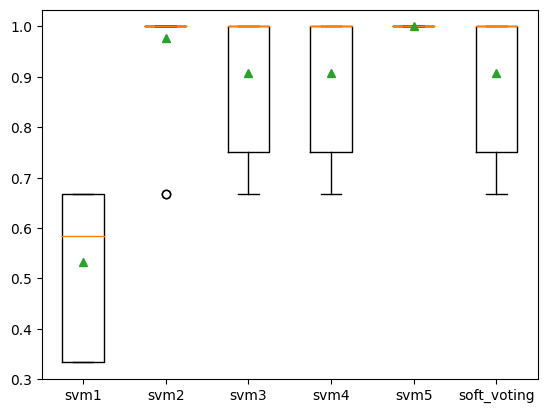

In [11]:
# compare soft voting ensemble to standalone classifiers
from numpy import mean
from numpy import std
from sklearn.datasets import make_classification
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.svm import SVC
from sklearn.ensemble import VotingClassifier
from matplotlib import pyplot

# get the dataset
def get_dataset():
 X, y = make_classification(n_samples=1000, n_features=20, n_informative=15, n_redundant=5, random_state=2)
 return X, y

# get a voting ensemble of models
def get_voting():
 # define the base models
 models = list()
 models.append(('svm1', SVC(probability=True, kernel='poly', degree=1)))
 models.append(('svm2', SVC(probability=True, kernel='poly', degree=2)))
 models.append(('svm3', SVC(probability=True, kernel='poly', degree=3)))
 models.append(('svm4', SVC(probability=True, kernel='poly', degree=4)))
 models.append(('svm5', SVC(probability=True, kernel='poly', degree=5)))
 # define the voting ensemble
 ensemble = VotingClassifier(estimators=models, voting='soft')
 return ensemble

# get a list of models to evaluate
def get_models():
 models = dict()
 models['svm1'] = SVC(probability=True, kernel='poly', degree=1)
 models['svm2'] = SVC(probability=True, kernel='poly', degree=2)
 models['svm3'] = SVC(probability=True, kernel='poly', degree=3)
 models['svm4'] = SVC(probability=True, kernel='poly', degree=4)
 models['svm5'] = SVC(probability=True, kernel='poly', degree=5)
 models['soft_voting'] = get_voting()
 return models

# evaluate a give model using cross-validation
def evaluate_model(model, X, y):
 cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
 scores = cross_val_score(model, X, y, scoring='accuracy', cv=cv, n_jobs=-1, error_score='raise')
 return scores


# get the models to evaluate
models = get_models()
# evaluate the models and store results
results, names = list(), list()
for name, model in models.items():
 scores = evaluate_model(model, X_train, Y_train)
 results.append(scores)
 names.append(name)
 print('>%s %.3f (%.3f)' % (name, mean(scores), std(scores)))
# plot model performance for comparison
pyplot.boxplot(results, labels=names, showmeans=True)
pyplot.show()

>cart1 -0.065 (0.092)
>cart2 -0.064 (0.129)
>cart3 -0.064 (0.129)
>cart4 -0.064 (0.129)
>cart5 -0.064 (0.129)
>voting -0.064 (0.117)


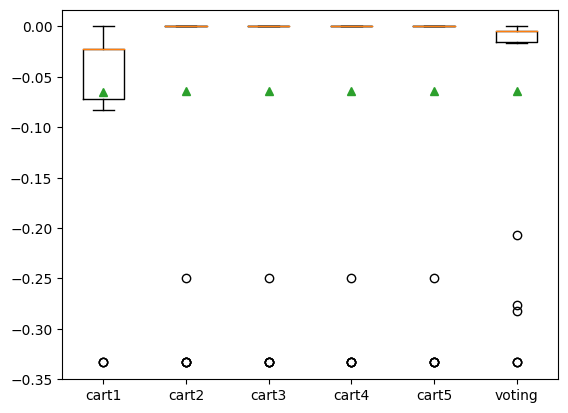

In [12]:
# compare voting ensemble to each standalone models for regression
from numpy import mean
from numpy import std
from sklearn.datasets import make_regression
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedKFold
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import VotingRegressor
from matplotlib import pyplot
from sklearn.preprocessing import LabelEncoder


# get a voting ensemble of models
def get_voting():
 # define the base models
 models = list()
 models.append(('cart1', DecisionTreeRegressor(max_depth=1)))
 models.append(('cart2', DecisionTreeRegressor(max_depth=2)))
 models.append(('cart3', DecisionTreeRegressor(max_depth=3)))
 models.append(('cart4', DecisionTreeRegressor(max_depth=4)))
 models.append(('cart5', DecisionTreeRegressor(max_depth=5)))
 # define the voting ensemble
 ensemble = VotingRegressor(estimators=models)
 return ensemble

# get a list of models to evaluate
def get_models():
 models = dict()
 models['cart1'] = DecisionTreeRegressor(max_depth=1)
 models['cart2'] = DecisionTreeRegressor(max_depth=2)
 models['cart3'] = DecisionTreeRegressor(max_depth=3)
 models['cart4'] = DecisionTreeRegressor(max_depth=4)
 models['cart5'] = DecisionTreeRegressor(max_depth=5)
 models['voting'] = get_voting()
 return models

# evaluate a give model using cross-validation
def evaluate_model(model, X, y):
 cv = RepeatedKFold(n_splits=10, n_repeats=3, random_state=1)
 scores = cross_val_score(model, X, y, scoring='neg_mean_absolute_error', cv=cv, n_jobs=-1, error_score='raise')
 return scores

# using labelencoder to convert string target value into no.
lb = LabelEncoder()
X_train[0] = lb.fit_transform(X_train[0])
X_train[1] = lb.fit_transform(X_train[1])
Y_train = lb.fit_transform(Y_train)

# get the models to evaluate
models = get_models()
# evaluate the models and store results
results, names = list(), list()
for name, model in models.items():
 scores = evaluate_model(model, X_train, Y_train)
 results.append(scores)
 names.append(name)
 print('>%s %.3f (%.3f)' % (name, mean(scores), std(scores)))
# plot model performance for comparison
pyplot.boxplot(results, labels=names, showmeans=True)
pyplot.show()

In [13]:
# @title AdaBoost Apple Oranges

import pandas as pd
data = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/apples_and_oranges.csv")


In [14]:
from sklearn.model_selection import train_test_split
training_set, test_set = train_test_split(data, test_size = 0.2, random_state = 1)

In [15]:
X_train = training_set.iloc[:,0:2].values
Y_train = training_set.iloc[:,2].values
X_test = test_set.iloc[:,0:2].values
Y_test = test_set.iloc[:,2].values

In [16]:
from sklearn.ensemble import AdaBoostClassifier
adaboost = AdaBoostClassifier(n_estimators=50, estimator=None, learning_rate=1, random_state = 1)
adaboost.fit(X_train,Y_train)

AdaBoostClassifier(learning_rate=1, random_state=1)

In [17]:
Y_pred = adaboost.predict(X_test)

In [18]:
print(Y_test)

['orange' 'orange' 'apple' 'orange' 'orange' 'apple' 'orange' 'apple']


In [19]:
test_set["Predictions"] = Y_pred

In [20]:
print(Y_pred)

['orange' 'orange' 'apple' 'orange' 'orange' 'apple' 'orange' 'apple']


In [21]:
from sklearn.metrics import classification_report
print(classification_report(Y_test, Y_pred))

              precision    recall  f1-score   support

       apple       1.00      1.00      1.00         3
      orange       1.00      1.00      1.00         5

    accuracy                           1.00         8
   macro avg       1.00      1.00      1.00         8
weighted avg       1.00      1.00      1.00         8



In [22]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(Y_test,Y_pred)
accuracy = float(cm.diagonal().sum())/len(Y_test)
print("\nAccuracy Of AdaBoost For The Given Dataset : ", accuracy)


Accuracy Of AdaBoost For The Given Dataset :  1.0


In [24]:
# @title Gradient Boosting on Apple orange csv
import pandas as pd
# Import models and utility functions
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
data = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/apples_and_oranges.csv")

In [25]:
from sklearn.model_selection import train_test_split
training_set, test_set = train_test_split(data, test_size = 0.2, random_state = 1)

In [26]:
X_train = training_set.iloc[:,0:2].values
Y_train = training_set.iloc[:,2].values
X_test = test_set.iloc[:,0:2].values
Y_test = test_set.iloc[:,2].values

In [27]:
# Define Gradient Boosting Classifier with hyperparameters

gbc=GradientBoostingClassifier(n_estimators=500,learning_rate=0.05,random_state=100,max_features=5 )

# Fit train data to GBC

gbc.fit(X_train,Y_train)

GradientBoostingClassifier(learning_rate=0.05, max_features=5, n_estimators=500,
                           random_state=100)

In [28]:
# Confusion matrix will give number of correct and incorrect classifications
print(confusion_matrix(Y_test, gbc.predict(X_test)))

[[3 0]
 [2 3]]


In [29]:
# Accuracy of model

print("GBC accuracy is %2.2f" % accuracy_score( Y_test, gbc.predict(X_test)))

GBC accuracy is 0.75


In [30]:
from sklearn.metrics import classification_report
pred=gbc.predict(X_test)
print(classification_report(Y_test, pred))

              precision    recall  f1-score   support

       apple       0.60      1.00      0.75         3
      orange       1.00      0.60      0.75         5

    accuracy                           0.75         8
   macro avg       0.80      0.80      0.75         8
weighted avg       0.85      0.75      0.75         8



In [31]:
# @title Gradient Boost on Social Network

import pandas as pd
# Import models and utility functions
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
data = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/Social_Network_Ads (1).csv")

In [32]:
from sklearn.model_selection import train_test_split
training_set, test_set = train_test_split(data, test_size = 0.2, random_state = 1)

In [33]:
X_train = training_set.iloc[:,0:2].values
Y_train = training_set.iloc[:,2].values
X_test = test_set.iloc[:,0:2].values
Y_test = test_set.iloc[:,2].values

In [34]:
# Define Gradient Boosting Classifier with hyperparameters

gbc=GradientBoostingClassifier(n_estimators=500,learning_rate=0.05,random_state=100,max_features=5 )

# Fit train data to GBC

gbc.fit(X_train,Y_train)

GradientBoostingClassifier(learning_rate=0.05, max_features=5, n_estimators=500,
                           random_state=100)

In [35]:
# Confusion matrix will give number of correct and incorrect classifications
print(confusion_matrix(Y_test, gbc.predict(X_test)))

[[38 10]
 [ 4 28]]


In [36]:
# Accuracy of model

print("GBC accuracy is %2.2f" % accuracy_score( Y_test, gbc.predict(X_test)))

GBC accuracy is 0.82


In [37]:
from sklearn.metrics import classification_report
pred=gbc.predict(X_test)
print(classification_report(Y_test, pred))

              precision    recall  f1-score   support

           0       0.90      0.79      0.84        48
           1       0.74      0.88      0.80        32

    accuracy                           0.82        80
   macro avg       0.82      0.83      0.82        80
weighted avg       0.84      0.82      0.83        80



In [39]:
# @title Adaboost on social network

import pandas as pd
data = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/Social_Network_Ads (1).csv")

In [41]:
from sklearn.model_selection import train_test_split
training_set, test_set = train_test_split(data, test_size = 0.2, random_state = 1)

In [42]:
X_train = training_set.iloc[:,0:2].values
Y_train = training_set.iloc[:,2].values
X_test = test_set.iloc[:,0:2].values
Y_test = test_set.iloc[:,2].values

In [43]:
from sklearn.ensemble import AdaBoostClassifier
adaboost = AdaBoostClassifier(n_estimators=50, estimator=None, learning_rate=1, random_state = 1)
adaboost.fit(X_train,Y_train)

AdaBoostClassifier(learning_rate=1, random_state=1)

In [44]:
Y_pred = adaboost.predict(X_test)

In [45]:
print(Y_test)

[0 0 1 1 0 0 0 1 0 0 0 0 0 1 1 1 1 0 0 1 0 1 1 0 1 0 1 0 1 0 0 0 0 1 0 0 0
 0 1 0 1 1 0 0 1 1 1 1 0 1 0 0 1 1 1 0 1 0 1 1 0 0 0 0 1 1 0 0 0 0 0 0 1 0
 0 1 0 0 0 0]


In [46]:
test_set["Predictions"] = Y_pred

In [47]:
print(Y_pred)

[0 0 1 1 0 0 0 1 0 1 0 0 0 1 1 1 1 0 0 1 0 1 1 1 1 0 1 1 1 1 0 0 0 1 0 0 0
 0 1 0 1 1 1 0 1 1 1 1 0 1 0 0 0 1 0 0 1 0 1 1 0 0 1 0 1 1 0 0 0 0 1 0 1 0
 0 1 0 0 0 0]


In [48]:
from sklearn.metrics import classification_report
print(classification_report(Y_test, Y_pred))

              precision    recall  f1-score   support

           0       0.95      0.85      0.90        48
           1       0.81      0.94      0.87        32

    accuracy                           0.89        80
   macro avg       0.88      0.90      0.89        80
weighted avg       0.90      0.89      0.89        80



In [49]:
# @title VotingEnsembly on social network

# Import models and utility functions
import pandas as pd

from sklearn.ensemble import VotingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.datasets import load_iris
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
data = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/Social_Network_Ads (1).csv")


In [50]:
from sklearn.model_selection import train_test_split
training_set, test_set = train_test_split(data, test_size = 0.2, random_state = 1)

In [51]:
X_train = training_set.iloc[:,0:2].values
Y_train = training_set.iloc[:,2].values
X_test = test_set.iloc[:,0:2].values
Y_test = test_set.iloc[:,2].values

In [52]:
# group / ensemble of models
estimator = []
estimator.append(('LR',
                  LogisticRegression(solver ='lbfgs',
                                     multi_class ='multinomial',
                                     max_iter = 200)))
estimator.append(('SVC', SVC(gamma ='auto', probability = True)))
estimator.append(('DTC', DecisionTreeClassifier()))

In [53]:
# Voting Classifier with hard voting
vot_hard = VotingClassifier(estimators = estimator, voting ='hard')
vot_hard.fit(X_train, Y_train)
y_pred = vot_hard.predict(X_test)

# using accuracy_score metric to predict accuracy
score = accuracy_score(Y_test, y_pred)
print("Hard Voting Score % d" % score)

Hard Voting Score  0


In [54]:
# Voting Classifier with soft voting
vot_soft = VotingClassifier(estimators = estimator, voting ='soft')
vot_soft.fit(X_train, Y_train)
y_pred = vot_soft.predict(X_test)

# using accuracy_score
score = accuracy_score(Y_test, y_pred)
print("Soft Voting Score % d" % score)

Soft Voting Score  0


In [55]:
# compare hard voting to standalone classifiers
from numpy import mean
from numpy import std
from sklearn.datasets import make_classification
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import VotingClassifier
from matplotlib import pyplot

>knn1 0.830 (0.067)
>knn3 0.800 (0.051)
>knn5 0.815 (0.056)
>knn7 0.831 (0.054)
>knn9 0.832 (0.058)
>hard_voting 0.832 (0.056)


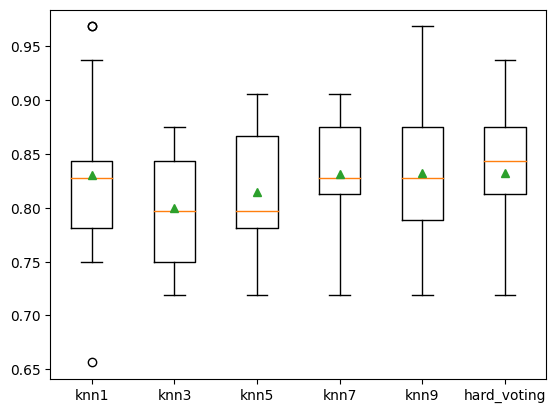

In [56]:
# get a voting ensemble of models
def get_voting():
 # define the base models
 models = list()
 models.append(('knn1', KNeighborsClassifier(n_neighbors=1)))
 models.append(('knn3', KNeighborsClassifier(n_neighbors=3)))
 models.append(('knn5', KNeighborsClassifier(n_neighbors=5)))
 models.append(('knn7', KNeighborsClassifier(n_neighbors=7)))
 models.append(('knn9', KNeighborsClassifier(n_neighbors=9)))
 # define the voting ensemble
 ensemble = VotingClassifier(estimators=models, voting='hard')
 return ensemble

# get a list of models to evaluate
def get_models():
 models = dict()
 models['knn1'] = KNeighborsClassifier(n_neighbors=1)
 models['knn3'] = KNeighborsClassifier(n_neighbors=3)
 models['knn5'] = KNeighborsClassifier(n_neighbors=5)
 models['knn7'] = KNeighborsClassifier(n_neighbors=7)
 models['knn9'] = KNeighborsClassifier(n_neighbors=9)
 models['hard_voting'] = get_voting()
 return models

# evaluate a give model using cross-validation
def evaluate_model(model, X_train, Y_train):
 cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
 scores = cross_val_score(model, X_train, Y_train, scoring='accuracy', cv=cv, n_jobs=-1, error_score='raise')
 return scores

# get the models to evaluate
models = get_models()
# evaluate the models and store results
results, names = list(), list()
for name, model in models.items():
 scores = evaluate_model(model, X_train, Y_train)
 results.append(scores)
 names.append(name)
 print('>%s %.3f (%.3f)' % (name, mean(scores), std(scores)))
# plot model performance for comparison
pyplot.boxplot(results, labels=names, showmeans=True)
pyplot.show()

>svm1 0.787 (0.046)
>svm2 0.773 (0.047)
>svm3 0.771 (0.049)
>svm4 0.774 (0.046)
>svm5 0.773 (0.048)
>soft_voting 0.787 (0.046)


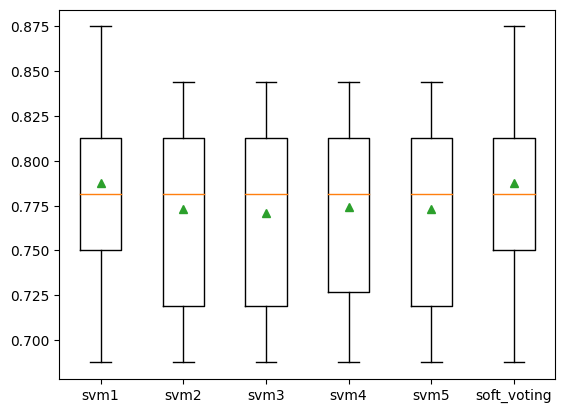

In [57]:
# compare soft voting ensemble to standalone classifiers
from numpy import mean
from numpy import std
from sklearn.datasets import make_classification
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.svm import SVC
from sklearn.ensemble import VotingClassifier
from matplotlib import pyplot

# get the dataset
def get_dataset():
 X, y = make_classification(n_samples=1000, n_features=20, n_informative=15, n_redundant=5, random_state=2)
 return X, y

# get a voting ensemble of models
def get_voting():
 # define the base models
 models = list()
 models.append(('svm1', SVC(probability=True, kernel='poly', degree=1)))
 models.append(('svm2', SVC(probability=True, kernel='poly', degree=2)))
 models.append(('svm3', SVC(probability=True, kernel='poly', degree=3)))
 models.append(('svm4', SVC(probability=True, kernel='poly', degree=4)))
 models.append(('svm5', SVC(probability=True, kernel='poly', degree=5)))
 # define the voting ensemble
 ensemble = VotingClassifier(estimators=models, voting='soft')
 return ensemble

# get a list of models to evaluate
def get_models():
 models = dict()
 models['svm1'] = SVC(probability=True, kernel='poly', degree=1)
 models['svm2'] = SVC(probability=True, kernel='poly', degree=2)
 models['svm3'] = SVC(probability=True, kernel='poly', degree=3)
 models['svm4'] = SVC(probability=True, kernel='poly', degree=4)
 models['svm5'] = SVC(probability=True, kernel='poly', degree=5)
 models['soft_voting'] = get_voting()
 return models

# evaluate a give model using cross-validation
def evaluate_model(model, X, y):
 cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
 scores = cross_val_score(model, X, y, scoring='accuracy', cv=cv, n_jobs=-1, error_score='raise')
 return scores


# get the models to evaluate
models = get_models()
# evaluate the models and store results
results, names = list(), list()
for name, model in models.items():
 scores = evaluate_model(model, X_train, Y_train)
 results.append(scores)
 names.append(name)
 print('>%s %.3f (%.3f)' % (name, mean(scores), std(scores)))
# plot model performance for comparison
pyplot.boxplot(results, labels=names, showmeans=True)
pyplot.show()

>cart1 -0.277 (0.042)
>cart2 -0.142 (0.037)
>cart3 -0.141 (0.038)
>cart4 -0.134 (0.048)
>cart5 -0.124 (0.050)
>voting -0.163 (0.037)


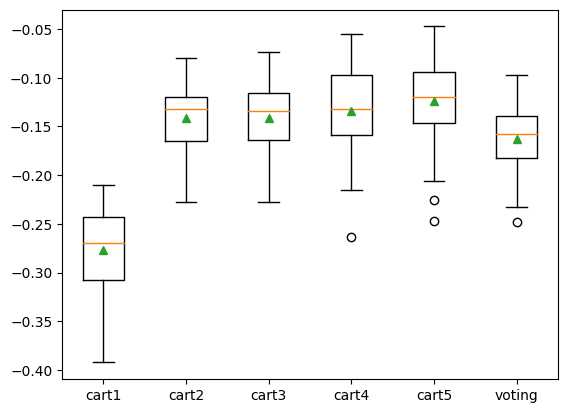

In [58]:
# compare voting ensemble to each standalone models for regression
from numpy import mean
from numpy import std
from sklearn.datasets import make_regression
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedKFold
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import VotingRegressor
from matplotlib import pyplot
from sklearn.preprocessing import LabelEncoder


# get a voting ensemble of models
def get_voting():
 # define the base models
 models = list()
 models.append(('cart1', DecisionTreeRegressor(max_depth=1)))
 models.append(('cart2', DecisionTreeRegressor(max_depth=2)))
 models.append(('cart3', DecisionTreeRegressor(max_depth=3)))
 models.append(('cart4', DecisionTreeRegressor(max_depth=4)))
 models.append(('cart5', DecisionTreeRegressor(max_depth=5)))
 # define the voting ensemble
 ensemble = VotingRegressor(estimators=models)
 return ensemble

# get a list of models to evaluate
def get_models():
 models = dict()
 models['cart1'] = DecisionTreeRegressor(max_depth=1)
 models['cart2'] = DecisionTreeRegressor(max_depth=2)
 models['cart3'] = DecisionTreeRegressor(max_depth=3)
 models['cart4'] = DecisionTreeRegressor(max_depth=4)
 models['cart5'] = DecisionTreeRegressor(max_depth=5)
 models['voting'] = get_voting()
 return models

# evaluate a give model using cross-validation
def evaluate_model(model, X, y):
 cv = RepeatedKFold(n_splits=10, n_repeats=3, random_state=1)
 scores = cross_val_score(model, X, y, scoring='neg_mean_absolute_error', cv=cv, n_jobs=-1, error_score='raise')
 return scores

# using labelencoder to convert string target value into no.
lb = LabelEncoder()
X_train[0] = lb.fit_transform(X_train[0])
X_train[1] = lb.fit_transform(X_train[1])
Y_train = lb.fit_transform(Y_train)

# get the models to evaluate
models = get_models()
# evaluate the models and store results
results, names = list(), list()
for name, model in models.items():
 scores = evaluate_model(model, X_train, Y_train)
 results.append(scores)
 names.append(name)
 print('>%s %.3f (%.3f)' % (name, mean(scores), std(scores)))
# plot model performance for comparison
pyplot.boxplot(results, labels=names, showmeans=True)
pyplot.show()